In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [36]:
prompt_types = {
    "empty": {
        # "compute_is_right_GPT_opinion": compute_is_right_GPT_opinion,
        # "start": ""
        "friendly_name": "empty"

    },
    # "self_ask_zero_shot": {
    # #     "compute_is_right_GPT_opinion": compute_is_right_GPT_opinion,
    # #     "start": ""
    # },
    "self_ask_two_hop_zero_shot": {
    #     "compute_is_right_GPT_opinion": compute_is_right_GPT_opinion,
    #     "start": ""
        "friendly_name": "self_ask_zero_shot"
    },
    "direct_answer": {
        # "compute_is_right_GPT_opinion": DA_compute_is_right_GPT_opinion,
        # "start": "So the final answer is: "
        "friendly_name": "direct_answer"

    },
    # "chain_of_thought_zero_shot": {
    #     # "compute_is_right_GPT_opinion": compute_is_right_GPT_opinion,
    #     # "start": "Answer: "
        # "friendly_name": "chain_of_thought_zero_shot"

    # },
    "self_ask": {
    #     "compute_is_right_GPT_opinion": compute_is_right_GPT_opinion,
    #     "start": "Are follow up questions needed here: Yes.\n"
        "friendly_name": "self_ask"

    },
    #  "chain_of_thought": {
    # #     "compute_is_right_GPT_opinion": compute_is_right_GPT_opinion,
    # #     "start": "Answer: "
        # "friendly_name": "chain_of_thought"

    # },
    "both_subquestions": {
    #     "compute_is_right_GPT_opinion": compute_is_right_GPT_opinion,
    #     "start": "Answer: "
        "friendly_name": "both_subquestions"

    }
}

dict_keys(['empty_correct_EM', 'self_ask_zero_shot_correct_EM', 'self_ask_two_hop_zero_shot_correct_EM', 'direct_answer_correct_EM', 'chain_of_thought_zero_shot_correct_EM', 'chain_of_thought_correct_EM', 'self_ask_correct_EM', 'empty_correct_CEM', 'self_ask_zero_shot_correct_CEM', 'self_ask_two_hop_zero_shot_correct_CEM', 'direct_answer_correct_CEM', 'chain_of_thought_zero_shot_correct_CEM', 'chain_of_thought_correct_CEM', 'self_ask_correct_CEM', 'empty_correct_GPT_opinion', 'self_ask_zero_shot_correct_GPT_opinion', 'self_ask_two_hop_zero_shot_correct_GPT_opinion', 'direct_answer_correct_GPT_opinion', 'chain_of_thought_zero_shot_correct_GPT_opinion', 'chain_of_thought_correct_GPT_opinion', 'self_ask_correct_GPT_opinion', 'both_subquestions_correct_CEM', 'both_subquestions_correct_EM', 'both_subquestions_correct_GPT_opinion'])
dict_keys(['empty_correct_EM', 'self_ask_zero_shot_correct_EM', 'self_ask_two_hop_zero_shot_correct_EM', 'direct_answer_correct_EM', 'chain_of_thought_zero_shot_

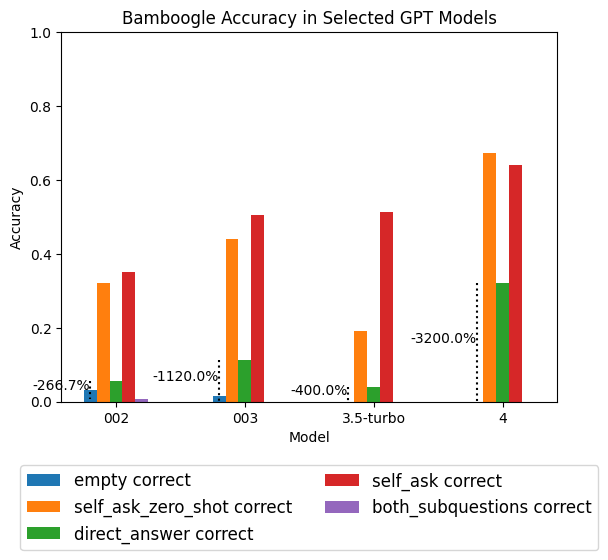

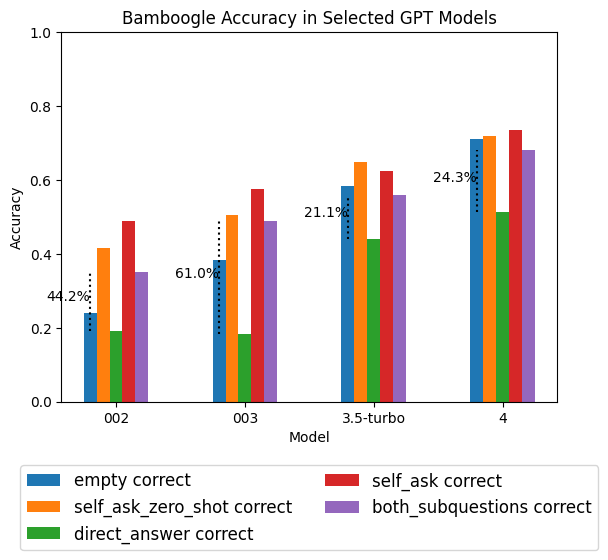

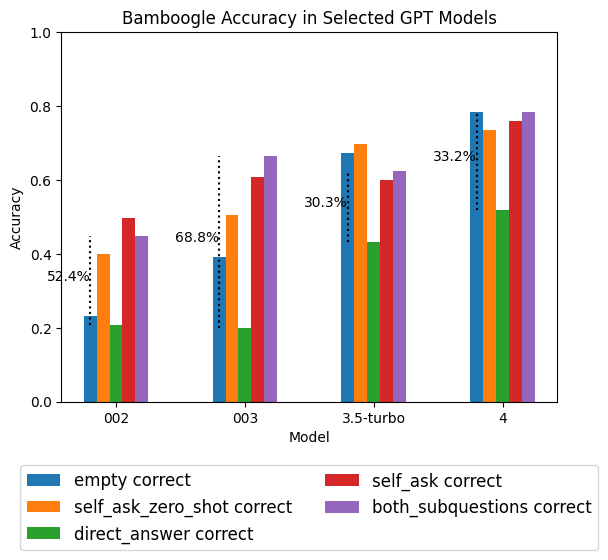

In [37]:

# Load data from JSON files
models = ["text-davinci-002", "text-davinci-003",  "gpt-3.5-turbo", "gpt-4"]

models_to_short_names = {
    'ada': 'ada', 
    'babbage': 'babbage', 
    'curie': 'curie',
    'text-ada-001': 'ada', 
    'text-babbage-001': 'babbage', 
    'text-curie-001': 'curie',
    'text-davinci-001': '001', 
    'text-davinci-002': '002', 
    'text-davinci-003': '003',
    "davinci": "davinci", 
    'gpt-3.5-turbo': '3.5-turbo',
    "gpt-3.5-turbo_prefixwas a powerful smile at the radio want you want to be a sweet but it be in a bowl with a treaty going onto the shadeed": '3.5-turbo-prefixed',

    'gpt-3.5-turbo_default_sysprompt': "3.5",
    "gpt-4": "4"}


# models = ["text-davinci-001", "text-davinci-002", "gpt-3.5-turbo", "gpt-4"]

dataset_size = 125

data = {}
# with open(f'results/Bamboogle_results_gpt-4.json', 'r') as infile:
#     data["gpt-4"] = json.load(infile)["summary"]
# with open(f'results/Bamboogle_new_prompt_results_2gpt-3.5-turbo.json', 'r') as infile:
#     data["gpt-3.5-turbo"] = json.load(infile)["summary"]

for model in models:
    with open(f'results/Bamboogle_results_{model}.json', 'r') as infile:
        data[model] = json.load(infile)["summary"]
        print(data[model].keys())

def plot_accuracies(accuracies, match_type):
    bar_width = 0.1
    x = np.arange(len(models))

    fig, ax = plt.subplots()

    for i, prompt_type in enumerate(prompt_types):
        accuracy = accuracies[prompt_type]
        ax.bar(x + (i - (len(prompt_types) - 1) / 2) * bar_width, accuracy, width=bar_width, label=f'{prompt_types[prompt_type]["friendly_name"]} correct')

    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    # ax.set_title(f'Bamboogle Performance ({match_type})')
    ax.set_title(f'Bamboogle Accuracy in Selected GPT Models')

    ax.set_xticks(x)
    ax.set_xticklabels([models_to_short_names[model] for model in models], fontsize=10)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=12)

    for i, model in enumerate(models):
        compare_with = "direct_answer"
        difference = (accuracies[f"both_subquestions"][i] - accuracies[compare_with][i]) / (accuracies[f"both_subquestions"][i]+.01) * 100
        y_start = accuracies[compare_with][i]
        y_end = accuracies[f"both_subquestions"][i]
        x_pos = x[i] - 4 * 0.1 / 2
        ax.vlines(x_pos, y_start, y_end, linestyle='dotted', color='black')
        ax.annotate(f'{difference:.1f}%', xy=(x_pos, (y_start + y_end) / 2), fontsize=10, color='black', ha='right')


    plt.ylim(0, 1)
    plt.plot()



# Calculate accuracy for each prompt type and model
accuracies = {}
for match_type in ["EM", "CEM", "GPT_opinion"]:
    accuracies[match_type] = {}
    for prompt_type in prompt_types:
        key = f"{prompt_type}_correct_{match_type}"
        accuracies[match_type][prompt_type] = [data[model][key] / dataset_size for model in models]

    plot_accuracies(accuracies[match_type], match_type)






